### Importing Libraries

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud

sns.set(rc={'figure.figsize':(10, 4)})
pd.set_option('display.max_columns', 50)

%matplotlib inline

import warnings
warnings.filterwarnings("ignore") 

### Assessing Data

In [50]:
train = pd.read_csv('Train Dataset .csv')
test = pd.read_csv('Test Dataset.csv')
vdef = pd.read_csv('Variable_Definitions.csv')
sub = pd.read_csv('Sample Submission.csv')

In [51]:
train.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [52]:
test.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


In [53]:
test.rename(columns={'id': 'Id', 'age': 'Age', 'sex': 'Sex'}, inplace=True)

In [54]:
vdef
# sub.head()

,Variable defination
0,age
1,sex
2,chest pain type (4 values)
3,resting blood pressure
4,serum cholestoral in mg/dl
5,fasting blood sugar > 120 mg/dl
6,resting electrocardiographic results (values 0...
7,maximum heart rate achieved
8,exercise induced angina
9,oldpeak = ST depression induced by exercise re...


In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        7303 non-null   int64  
 1   Age       7303 non-null   int64  
 2   Sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB


#### Summary Statistics

In [56]:
# Numerical
train.describe()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000
mean,15021.535396,53.172669,0.499658,1.502533,147.447487,342.805970,0.493085,1.013008,136.506093,0.503218,3.129851,0.991510,2.019033,1.502259,0.813501
std,2886.026080,14.185970,0.500034,1.115594,31.099538,127.291998,0.499986,0.815806,38.141966,0.500024,1.791160,0.817291,1.410546,1.113137,0.389535
min,10001.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12521.500000,41.000000,0.000000,1.000000,120.000000,231.000000,0.000000,0.000000,104.000000,0.000000,1.600000,0.000000,1.000000,1.000000,1.000000
50%,15054.000000,53.000000,0.000000,1.000000,148.000000,341.000000,0.000000,1.000000,137.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000
75%,17513.500000,65.000000,1.000000,3.000000,174.000000,450.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000
max,19998.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Social features

In [57]:
train['Age'].sort_values().unique()

array([29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
       46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62,
       63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77],
      dtype=int64)

In [58]:
# #### Age levels
# bin_ages = [13,19,40,70, 100]
# bin_labels = ['teenagers', 'young_adult', 'adults', 'elders']
# fraud['age_levels'] = pd.cut(fraud['age'], bin_ages, labels=bin_labels)

#### Target Variable

In [59]:
train.duplicated().sum()

0

In [60]:
# Checking the feature types
print(f"contains {train.select_dtypes(include=['object']).shape[1]}  and categorical features, {train.select_dtypes(include=['int', 'float']).shape[1]} numerical features")

contains 0  and categorical features, 15 numerical features


## EDA

#### Target variable

In [61]:
# Inestigating the target variable
train['target'].value_counts()

1    5941
0    1362
Name: target, dtype: int64

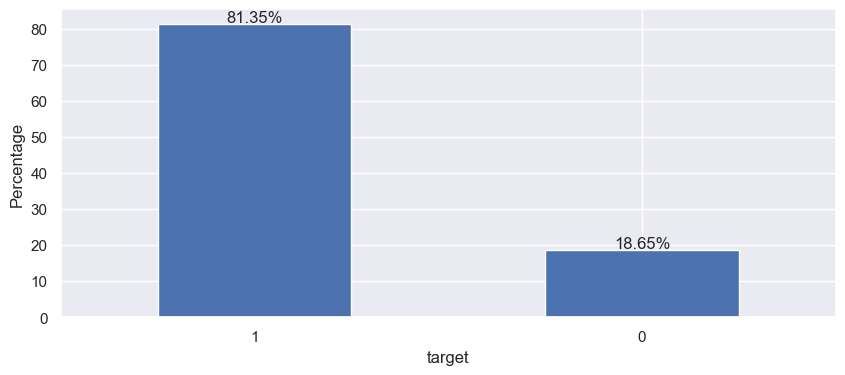

In [62]:
percentages = round(train['target'].value_counts(normalize=True)*100,2)
ax = percentages.plot(kind='bar', xlabel='target', ylabel='Percentage',  rot=0)

# Display percentages on the y-axis
for idx, value in enumerate(percentages):
    ax.text(idx, value + 0.5, f'{value:.2f}%', ha='center')


#### Preprocessing

In [63]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# numerical_features = ['trestbps', 'chol', 'thalach']
# train[numerical_features] = scaler.fit_transform(train[numerical_features])
# test[numerical_features] = scaler.fit_transform(test[numerical_features])

In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train.drop("target", axis=1)), columns=train.drop("target", axis=1).columns)
test_scaled = pd.DataFrame(scaler.transform(test), columns=test.columns)

# If you want to keep the 'Id' column in your scaled DataFrames:
train_scaled['target'] = train['target'].values

In [65]:
# # Plot Age Distribution
# train['Age'].hist()
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.title(f'Distribution of Age', size=12);

In [66]:
train_scaled.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.616785,0.083333,0.0,0.333333,0.603774,0.180365,1.0,0.0,0.633588,0.0,0.241935,0.5,1.00,0.333333,1
1,0.127438,0.500000,1.0,0.666667,0.981132,0.063927,0.0,0.5,0.251908,0.0,0.129032,1.0,0.25,0.000000,0
2,0.325098,0.166667,1.0,0.666667,0.066038,0.173516,1.0,0.0,0.641221,0.0,0.338710,0.5,0.75,0.333333,1
3,0.992298,0.958333,0.0,0.000000,0.179245,0.410959,1.0,1.0,0.129771,1.0,0.790323,0.0,0.50,0.666667,1
4,0.129239,0.125000,1.0,0.666667,0.424528,0.668950,1.0,0.5,0.725191,1.0,0.145161,1.0,1.00,0.000000,1


In [67]:
test_scaled.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.650195,0.854167,1.0,0.000000,0.650943,0.842466,0.0,1.0,0.755725,1.0,0.322581,0.5,0.00,0.333333
1,0.044313,0.666667,1.0,0.000000,0.349057,0.255708,0.0,1.0,0.022901,1.0,0.790323,1.0,0.50,0.666667
2,0.428829,0.500000,1.0,0.000000,0.009434,0.986301,1.0,0.5,0.015267,1.0,0.112903,0.5,0.25,0.000000
3,0.040812,0.166667,0.0,0.333333,0.792453,0.367580,0.0,0.5,0.923664,1.0,0.919355,0.5,0.00,0.000000
4,0.733120,0.125000,0.0,1.000000,0.094340,0.353881,0.0,0.0,0.389313,0.0,0.209677,0.5,1.00,1.000000


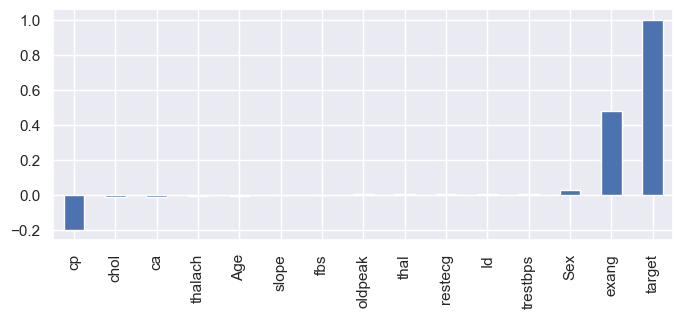

In [68]:
# Features correlation with target
train_scaled.corr()['target'].sort_values().plot(kind='bar',figsize=(8,3));

In [69]:
train_scaled.corr()['target'].sort_values(ascending=False)

target      1.000000
exang       0.481897
Sex         0.030608
trestbps    0.009320
Id          0.006148
restecg     0.005911
thal        0.005709
oldpeak     0.004899
fbs         0.003925
slope       0.001909
Age        -0.002846
thalach    -0.004634
ca         -0.008244
chol       -0.012291
cp         -0.198082
Name: target, dtype: float64

In [70]:
test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2697 entries, 0 to 2696
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        2697 non-null   float64
 1   Age       2697 non-null   float64
 2   Sex       2697 non-null   float64
 3   cp        2697 non-null   float64
 4   trestbps  2697 non-null   float64
 5   chol      2697 non-null   float64
 6   fbs       2697 non-null   float64
 7   restecg   2697 non-null   float64
 8   thalach   2697 non-null   float64
 9   exang     2697 non-null   float64
 10  oldpeak   2697 non-null   float64
 11  slope     2697 non-null   float64
 12  ca        2697 non-null   float64
 13  thal      2697 non-null   float64
dtypes: float64(14)
memory usage: 295.1 KB


### Preprocessing

#### Splitting

In [71]:
X = train_scaled.drop(["target", "Id"], axis=1)
X_test = test_scaled.drop(["Id"], axis=1)
y = train_scaled['target']

#### Build Model

In [72]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.utils import compute_class_weight
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [73]:
# Split data into train and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

#### RandomForestClassifier model

In [75]:
# Define the parameter distributions for Random Forest
param_distributions_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42, class_weight=class_weights)

# Initialize RandomizedSear
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_distributions_rf, cv=4, scoring='accuracy', n_iter=50, random_state=42)

# Fit the model
random_search_rf.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters for Random Forest:", random_search_rf.best_params_)
print("Best Score for Random Forest (Accuracy):", random_search_rf.best_score_)

# Retrieve the best parameters
best_params_rf = random_search_rf.best_params_

# Initialize the RandomForestClassifier model with the best parameters
best_rf_model = RandomForestClassifier(random_state=42, class_weight=class_weights, **best_params_rf)

# Train the best model
best_rf_model.fit(X_train, y_train)

# Calculate training accuracy
train_accuracy_rf = best_rf_model.score(X_train, y_train)
print(f'Training Accuracy (Random Forest): {train_accuracy_rf:.4f}')

# Make predictions on the test set
y_pred = best_rf_model.predict(X_val)

# Evaluate the model
# Evaluate the model
accuracy_rf = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy on Test Set (Random Forest): {accuracy_rf:.4f}')

Best Parameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 5}
Best Score for Random Forest (Accuracy): 0.8091414446851003
Training Accuracy (Random Forest): 0.8091
Validation Accuracy on Test Set (Random Forest): 0.8159


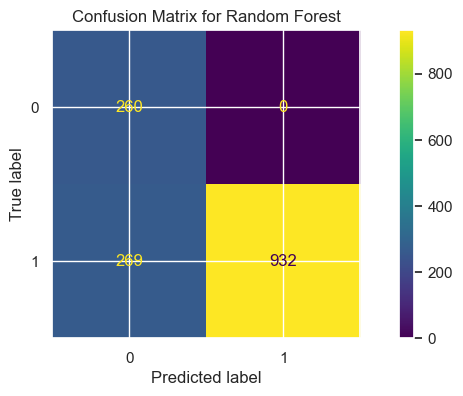

              precision    recall  f1-score   support

           0       0.49      1.00      0.66       260
           1       1.00      0.78      0.87      1201

    accuracy                           0.82      1461
   macro avg       0.75      0.89      0.77      1461
weighted avg       0.91      0.82      0.84      1461



In [76]:
# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Classification Report
print(classification_report(y_val, y_pred))

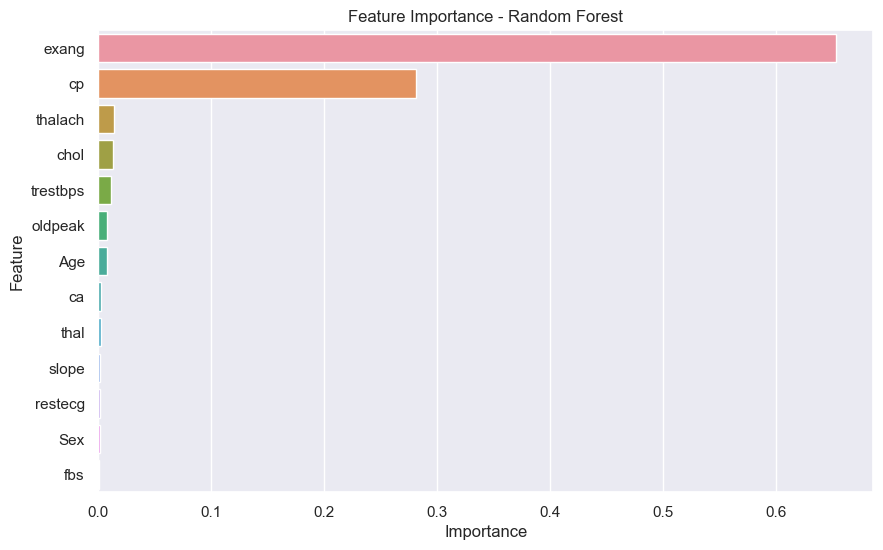

In [77]:
feature_importances_rf = best_rf_model.feature_importances_
features = X_train.columns

# Create a DataFrame for plotting
rf_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances_rf})
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df)
plt.title('Feature Importance - Random Forest')
plt.show()

#### LightGB model

In [ ]:
from lightgbm import LGBMClassifier

# Define the parameter distributions for LightGBM
param_distributions_lgb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [-1, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 63, 127],
    'min_data_in_leaf': [20, 30, 40]
}

# Initialize the LGBMClassifier model
lgb_model = LGBMClassifier(random_state=42, class_weight='balanced')

# Initialize RandomizedSearchCV
random_search_lgb = RandomizedSearchCV(estimator=lgb_model, param_distributions=param_distributions_lgb, cv=4, scoring='accuracy', n_iter=50, random_state=42)

# Fit the model
random_search_lgb.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters for LightGBM:", random_search_lgb.best_params_)
print("Best Score for LightGBM (Accuracy):", random_search_lgb.best_score_)

# Retrieve the best parameters
best_params_lgb = random_search_lgb.best_params_

# Initialize the LGBMClassifier model with the best parameters
best_lgb_model = LGBMClassifier(random_state=42, **best_params_lgb, class_weight='balanced',verbos=0)

# Train the best model
best_lgb_model.fit(X_train, y_train)

# Calculate training accuracy
train_accuracy_lgb = best_lgb_model.score(X_train, y_train)
print(f'Training Accuracy (LightGBM): {train_accuracy_lgb:.4f}')

# Make predictions on the test set
y_pred_lgb = best_lgb_model.predict(X_val)

# Evaluate the model
accuracy_lgb = accuracy_score(y_val, y_pred_lgb)
print(f'Validation Accuracy on Test Set (LightGBM): {accuracy_lgb:.4f}')

[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3555, number of negative: 826
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000372 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 4381, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM

In [ ]:
# Confusion Matrix
cm_lgb = confusion_matrix(y_val, y_pred_lgb)
disp_lgb = ConfusionMatrixDisplay(confusion_matrix=cm_lgb)
disp_lgb.plot()
plt.title('Confusion Matrix for LightGBM')
plt.show()

# Classification Report
print(classification_report(y_val, y_pred_lgb))

In [ ]:
# Assuming you have a trained LightGBM model called best_lgb_model
feature_importances_lgb = best_lgb_model.feature_importances_
features = X_train.columns

# Create a DataFrame for plotting
lgb_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances_lgb})
lgb_importance_df = lgb_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=lgb_importance_df)
plt.title('Feature Importance - LightGBM')
plt.show()

#### XGBClassifier

In [81]:
from xgboost import XGBClassifier

# Define the parameter distributions for XGBoost
param_distributions_xgb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Initialize the XGBClassifier model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=class_weights[1])

# Initialize RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_distributions_xgb, cv=4, scoring='accuracy',  n_iter=50, random_state=42)

# Fit the model
random_search_xgb.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters for XGBoost:", random_search_xgb.best_params_)
print("Best Score for XGBoost (Accuracy):", random_search_xgb.best_score_)

# Retrieve the best parameters
best_params_xgb = random_search_xgb.best_params_

# Initialize the XGBClassifier model with the best parameters
best_xgb_model = XGBClassifier(random_state=42, **best_params_xgb, scale_pos_weight=class_weights[1])

# Train the best model
best_xgb_model.fit(X_train, y_train)

# Calculate training accuracy
train_accuracy_xgb = best_xgb_model.score(X_train, y_train)
print(f'Training Accuracy (XGBoost): {train_accuracy_xgb:.4f}')

# Make predictions on the test set
y_pred_xgb = best_xgb_model.predict(X_val)

# Evaluate the model
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
print(f'Validation Accuracy on Test Set (XGBoost): {accuracy_xgb:.4f}')

Best Parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7}
Best Score for XGBoost (Accuracy): 0.8115376501364238
Training Accuracy (XGBoost): 0.8218
Validation Accuracy on Test Set (XGBoost): 0.8152


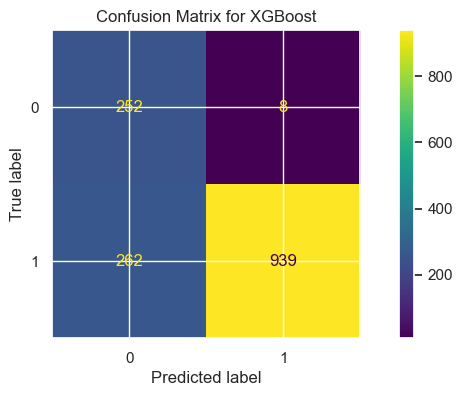

              precision    recall  f1-score   support

           0       0.49      0.97      0.65       260
           1       0.99      0.78      0.87      1201

    accuracy                           0.82      1461
   macro avg       0.74      0.88      0.76      1461
weighted avg       0.90      0.82      0.83      1461



In [82]:
# Confusion Matrix
cm_xgb = confusion_matrix(y_val, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp_xgb.plot()
plt.title('Confusion Matrix for XGBoost')
plt.show()

# Classification Report
print(classification_report(y_val, y_pred_xgb))

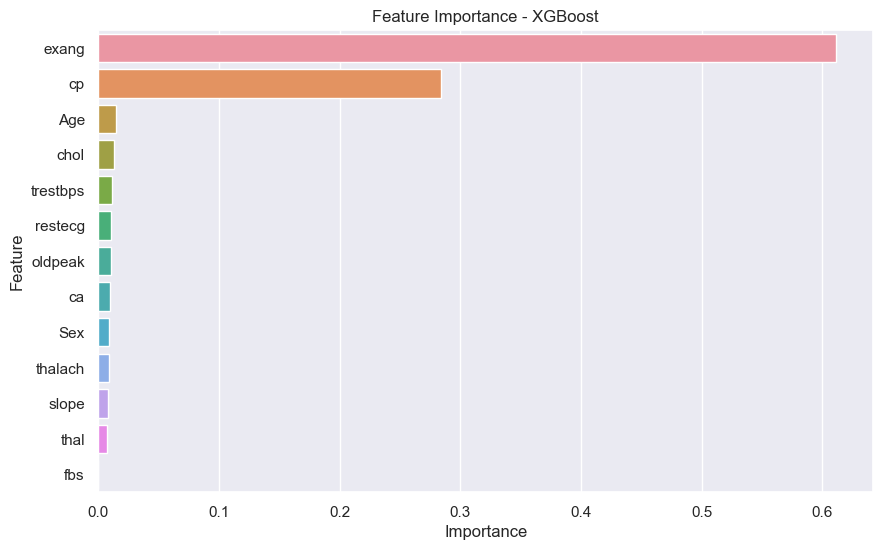

In [83]:
# Assuming you have a trained XGBoost model called best_xgb_model
feature_importances_xgb = best_xgb_model.feature_importances_
features = X_train.columns

# Create a DataFrame for plotting
xgb_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances_xgb})
xgb_importance_df = xgb_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_importance_df)
plt.title('Feature Importance - XGBoost')
plt.show()

#### CatBoost

In [84]:
from catboost import CatBoostClassifier

# Define the parameter distributions for CatBoost
param_distributions_cat = {
    'iterations': [100, 200, 300],
    'depth': [4, 5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5]
}

# Initialize the CatBoostClassifier model
cat_model = CatBoostClassifier(random_state=42, verbose=0, class_weights=class_weights)

# Initialize RandomizedSearchCV
random_search_cat = RandomizedSearchCV(estimator=cat_model, param_distributions=param_distributions_cat, cv=4, scoring='accuracy',  n_iter=50, random_state=42)

# Fit the model
random_search_cat.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters for CatBoost:", random_search_cat.best_params_)
print("Best Score for CatBoost (Accuracy):", random_search_cat.best_score_)

# Retrieve the best parameters
best_params_cat = random_search_cat.best_params_

# Initialize the CatBoostClassifier model with the best parameters
best_cat_model = CatBoostClassifier(random_state=42, **best_params_cat, class_weights=class_weights)

# Train the best model
best_cat_model.fit(X_train, y_train)

# Calculate training accuracy
train_accuracy_cat = best_cat_model.score(X_train, y_train)
print(f'Training Accuracy (CatBoost): {train_accuracy_cat:.4f}')

# Make predictions on the test set
y_pred_cat = best_cat_model.predict(X_val)

# Evaluate the model
accuracy_cat = accuracy_score(y_val, y_pred_cat)
print(f'Validation Accuracy on Test Set (CatBoost): {accuracy_cat:.4f}')

Best Parameters for CatBoost: {'learning_rate': 0.2, 'l2_leaf_reg': 1, 'iterations': 100, 'depth': 6}
Best Score for CatBoost (Accuracy): 0.8125648129916645
0:	learn: 0.5839884	total: 2.71ms	remaining: 268ms
1:	learn: 0.5111784	total: 5.25ms	remaining: 257ms
2:	learn: 0.4609755	total: 8.21ms	remaining: 265ms
3:	learn: 0.4236905	total: 10.8ms	remaining: 259ms
4:	learn: 0.3952249	total: 12.5ms	remaining: 238ms
5:	learn: 0.3750130	total: 15.2ms	remaining: 238ms
6:	learn: 0.3590486	total: 18ms	remaining: 239ms
7:	learn: 0.3469448	total: 20.6ms	remaining: 237ms
8:	learn: 0.3373057	total: 23ms	remaining: 232ms
9:	learn: 0.3301674	total: 25.8ms	remaining: 232ms
10:	learn: 0.3243823	total: 28.6ms	remaining: 232ms
11:	learn: 0.3194179	total: 31ms	remaining: 227ms
12:	learn: 0.3154510	total: 33.9ms	remaining: 227ms
13:	learn: 0.3117811	total: 36.9ms	remaining: 227ms
14:	learn: 0.3086362	total: 39.8ms	remaining: 226ms
15:	learn: 0.3062355	total: 42.9ms	remaining: 225ms
16:	learn: 0.3052022	total:

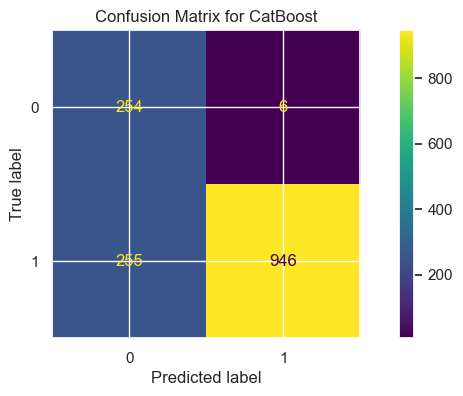

              precision    recall  f1-score   support

           0       0.50      0.98      0.66       260
           1       0.99      0.79      0.88      1201

    accuracy                           0.82      1461
   macro avg       0.75      0.88      0.77      1461
weighted avg       0.91      0.82      0.84      1461



In [85]:
# Confusion Matrix
cm_cat = confusion_matrix(y_val, y_pred_cat)
disp_cat = ConfusionMatrixDisplay(confusion_matrix=cm_cat)
disp_cat.plot()
plt.title('Confusion Matrix for CatBoost')
plt.show()

# Classification Report
print(classification_report(y_val, y_pred_cat))

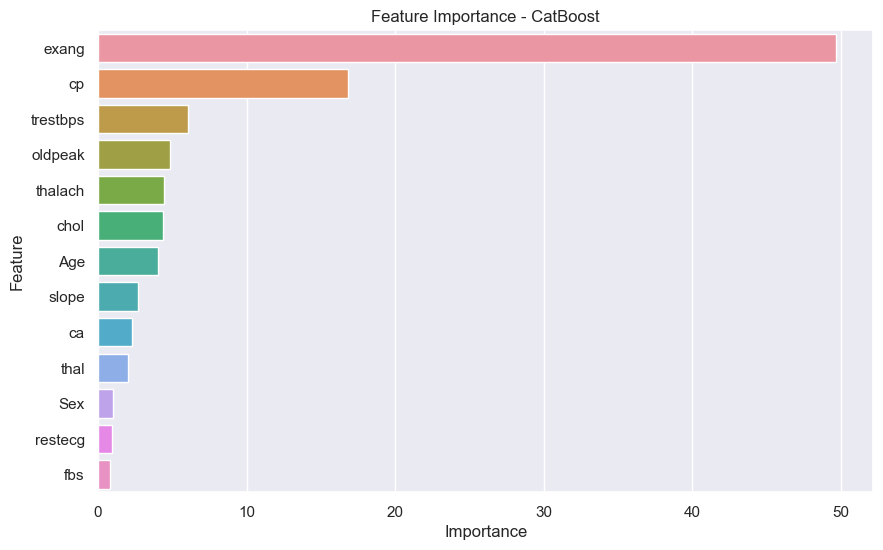

In [86]:
# Assuming you have a trained CatBoost model called best_cat_model
feature_importances_cat = best_cat_model.get_feature_importance()
features = X_train.columns

# Create a DataFrame for plotting
cat_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances_cat})
cat_importance_df = cat_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=cat_importance_df)
plt.title('Feature Importance - CatBoost')
plt.show()

In [87]:
test_pred1 = best_rf_model.predict(X_test)
test_pred2 = best_cat_model.predict(X_test)
test_pred3 = best_xgb_model.predict(X_test)
test_pred4 = best_lgb_model.predict(X_test)

[LightGBM] [Warning] Unknown parameter: verbos
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


In [88]:
sub.head()

,Id
0,16501
1,10444
2,14288
3,10409
4,17330


In [89]:
# Create a submission DataFrame
submission = pd.DataFrame({
    'ID': sub['Id'],
    'Target': test_pred1
})

# Save the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)

In [90]:
# Create a submission DataFrame
submission = pd.DataFrame({
    'ID': sub['Id'],
    'Target': test_pred2
})

# Save the submission DataFrame to a CSV file
submission.to_csv('submission2.csv', index=False)

In [91]:
# Create a submission DataFrame
submission = pd.DataFrame({
    'ID': sub['Id'],
    'Target': test_pred3
})

# Save the submission DataFrame to a CSV file
submission.to_csv('submission3.csv', index=False)

In [92]:
# Create a submission DataFrame
submission = pd.DataFrame({
    'ID': sub['Id'],
    'Target': test_pred4
})

# Save the submission DataFrame to a CSV file
submission.to_csv('submission4.csv', index=False)

### Weighted Average

In [93]:
# Get predicted probabilities for each model
probs_xgb = best_xgb_model.predict_proba(X_val)
probs_rf = best_rf_model.predict_proba(X_val)
probs_lgb = best_lgb_model.predict_proba(X_val)

# Define weights for each model
weights = [0.4, 0.3, 0.3]

# Combine the probabilities using weighted sum
ensemble_probs = (weights[0] * probs_xgb + weights[1] * probs_rf + weights[2] * probs_lgb)

# Get final predictions by taking the class with the highest probability
ensemble_preds = ensemble_probs.argmax(axis=1)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_val, ensemble_preds)
print(f'Validation Accuracy on Test Set (Ensemble): {ensemble_accuracy:.4f}')

[LightGBM] [Warning] Unknown parameter: verbos
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
Validation Accuracy on Test Set (Ensemble): 0.8152


In [94]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_val, ensemble_preds)

# Generate classification report
class_report = classification_report(y_val, ensemble_preds)

# Print confusion matrix and classification report
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Confusion Matrix:
 [[255   5]
 [265 936]]

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.98      0.65       260
           1       0.99      0.78      0.87      1201

    accuracy                           0.82      1461
   macro avg       0.74      0.88      0.76      1461
weighted avg       0.90      0.82      0.83      1461



In [95]:
# Get predicted probabilities for each model
probs_xgb = best_xgb_model.predict_proba(X_test)
probs_rf = best_rf_model.predict_proba(X_test)
probs_lgb = best_lgb_model.predict_proba(X_test)

# Define weights for each model
weights = [0.4, 0.3, 0.3]

# Combine the probabilities using weighted sum
ensemble_probs = (weights[0] * probs_xgb + weights[1] * probs_rf + weights[2] * probs_lgb)

# Get final predictions by taking the class with the highest probability
ensemble_preds_test = ensemble_probs.argmax(axis=1)

[LightGBM] [Warning] Unknown parameter: verbos
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


In [96]:
# Create a submission DataFrame
submission = pd.DataFrame({
    'ID': sub['Id'],
    'Target': ensemble_preds_test
})

# Save the submission DataFrame to a CSV file
submission.to_csv('submissionweighted.csv', index=False)